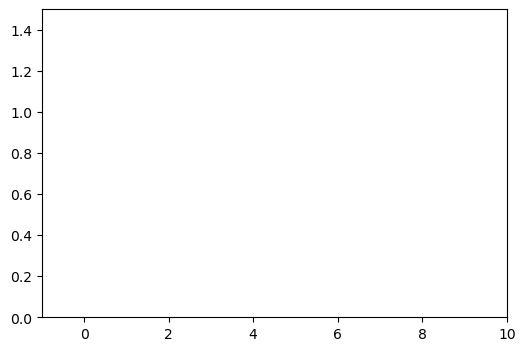

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns


np.random.seed(42)

population = np.random.exponential(scale=2.0, size=10000)

sample_sizes = np.linspace(1, 25, 100, dtype=int)
sample_per_size = 1000

fig, ax = plt.subplots(figsize=(6,4))
ax.set_xlim(-1, 10)
ax.set_ylim(0, 1.5)
ax.xaxis.grid(False)
ax.yaxis.grid(alpha=0.3)

def init():
    ax.clear()
    ax.set_xlim(-1, 10)
    ax.set_ylim(0, 1.5)
    return []

def update(n):
    ax.clear()
    sample_means = []
    for _ in range(sample_per_size):
        sample_means.append(np.random.choice(population, size=n).mean())
    ax.hist(sample_means, bins=30, color="#1db954", density=True)
    sns.kdeplot(sample_means, ax=ax, color='#b91d7a', linewidth=1, alpha=0.7)
    ax.set_title(f"Sampling Distrubition of the population (n={n})")
    ax.set_xlim(-1, 10)
    ax.set_ylim(0, 2)
    ax.xaxis.grid(False)
    ax.yaxis.grid(alpha=0.3)
    ax.spines[['top', 'right', 'left']].set_visible(False)
    return []

ani = animation.FuncAnimation(fig, update, frames=sample_sizes, init_func=init, blit=False, repeat=False)

ani.save("clt_animation.gif", writer="pillow", fps=10)

# from IPython.display import Image
# Image(filename="clt_animation.gif")

0.0029

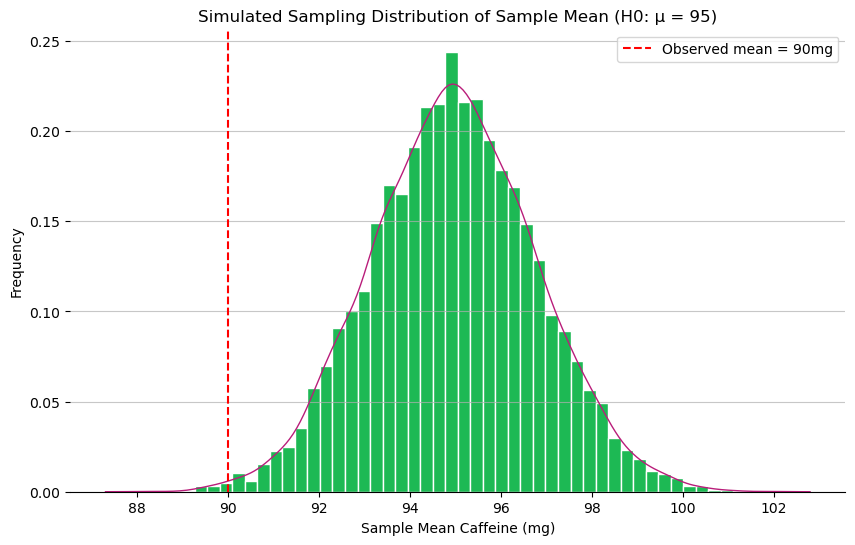

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Parameters
population_mean = 95
sample_size = 30
num_simulations = 10000
true_mean = 95
sample_std_dev = 10  # reasonable std dev for caffeine content
observed_sample_mean = 90

# Simulate sampling distribution under H0: mu = 95
np.random.seed(0)
sample_means = np.random.normal(loc=true_mean, scale=sample_std_dev / np.sqrt(sample_size), size=num_simulations)

# Calculate empirical p-value (one-sided)
p_value = np.mean(sample_means <= observed_sample_mean)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=50, color="#1db954", density=True, edgecolor='white')
sns.kdeplot(sample_means, color='#b91d7a', linewidth=1)
sns.despine(left=True)
plt.axvline(observed_sample_mean, color='red', linestyle='--', label=f'Observed mean = {observed_sample_mean}mg')
plt.title('Simulated Sampling Distribution of Sample Mean (H0: μ = 95)')
plt.xlabel('Sample Mean Caffeine (mg)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.7)

plt.savefig("Caffeine P-value Hist.png")

p_value



In [50]:
import scipy.stats as stat

t_statistic, p_value = stat.ttest_1samp(sample_means, 90)


(275.43162008808685, 0.0)